In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.linear_model import LogisticRegression

In [29]:
df = pd.read_excel("rawdata.xlsx")

In [30]:
df.head(5)

,date,time,sensor,location,number,activity,position,location.1
0,2024-01-16,10:10:30,0.0,A1,1,placed,inside,A1
1,2024-01-16,10:12:30,1.0,A2,1,picked,inside,A2
2,2024-01-16,10:28:30,1.0,A3,1,picked,Inside,A3
3,2024-01-16,10:38:20,0.0,A4,1,placed,Inside,A4
4,2024-01-16,10:45:20,1.0,A5,1,placed,inside,A5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        175 non-null    datetime64[ns]
 1   time        175 non-null    object        
 2   sensor      174 non-null    float64       
 3   location    175 non-null    object        
 4   number      175 non-null    int64         
 5   activity    175 non-null    object        
 6   position    175 non-null    object        
 7   location.1  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 11.1+ KB


In [32]:
df.isna().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of date          0
time          0
sensor        1
location      0
number        0
activity      0
position      0
location.1    0
dtype: int64>

In [33]:
df.nunique()

date            3
time          140
sensor          2
location       34
number          2
activity        2
position        3
location.1     34
dtype: int64

In [34]:
df=df.drop('location.1', axis=1)

In [35]:
df.head()

,date,time,sensor,location,number,activity,position
0,2024-01-16,10:10:30,0.0,A1,1,placed,inside
1,2024-01-16,10:12:30,1.0,A2,1,picked,inside
2,2024-01-16,10:28:30,1.0,A3,1,picked,Inside
3,2024-01-16,10:38:20,0.0,A4,1,placed,Inside
4,2024-01-16,10:45:20,1.0,A5,1,placed,inside


In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [37]:
df['position'] = label_encoder.fit_transform(df['position'])
df['activity'] = label_encoder.fit_transform(df['activity'])
df['location'] = label_encoder.fit_transform(df['location'])

In [38]:
df.head()

,date,time,sensor,location,number,activity,position
0,2024-01-16,10:10:30,0.0,0,1,1,1
1,2024-01-16,10:12:30,1.0,11,1,0,1
2,2024-01-16,10:28:30,1.0,22,1,0,0
3,2024-01-16,10:38:20,0.0,28,1,1,0
4,2024-01-16,10:45:20,1.0,29,1,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      175 non-null    datetime64[ns]
 1   time      175 non-null    object        
 2   sensor    174 non-null    float64       
 3   location  175 non-null    int32         
 4   number    175 non-null    int64         
 5   activity  175 non-null    int32         
 6   position  175 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(1)
memory usage: 7.6+ KB


In [40]:
numeric_cols = ['date', 'time']
df = df.drop(columns=numeric_cols)

In [41]:
df.dropna(inplace=True)

In [42]:
df.head()

,sensor,location,number,activity,position
0,0.0,0,1,1,1
1,1.0,11,1,0,1
2,1.0,22,1,0,0
3,0.0,28,1,1,0
4,1.0,29,1,1,1


C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

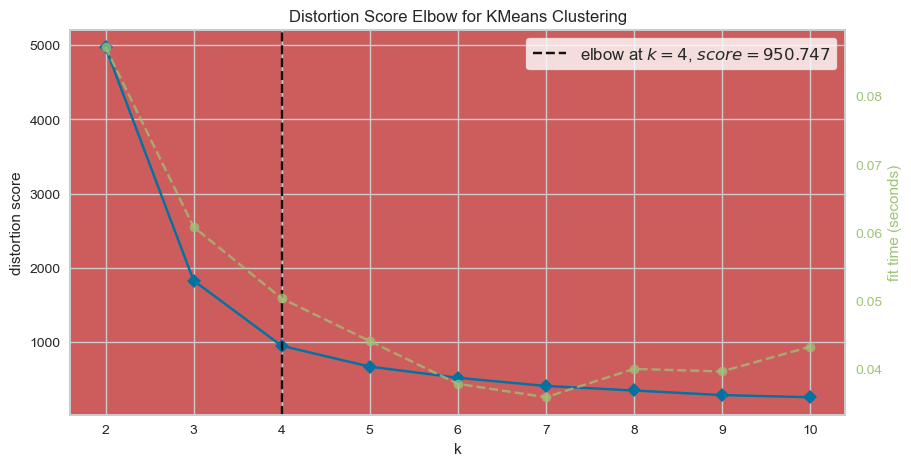

Therefore K = 4


In [44]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(df)
Elbow_M.show()
print("Therefore K = 4")

In [45]:
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df)

C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rakes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [46]:
df["Clusters"]=kmeans.labels_

In [48]:
print("Silhouette score :",silhouette_score(df, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.6215244870611344


In [47]:
df.head()

,sensor,location,number,activity,position,Clusters
0,0.0,0,1,1,1,1
1,1.0,11,1,0,1,3
2,1.0,22,1,0,0,0
3,0.0,28,1,1,0,2
4,1.0,29,1,1,1,2
